In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Auto.csv', na_values='?')
df = df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

# Simple Linear Regression

In [4]:
linear_model = sm.OLS.from_formula('mpg ~ horsepower', df)
results = linear_model.fit()

In [5]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           7.03e-81
Time:                        21:17:35   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

# Plotting The Data

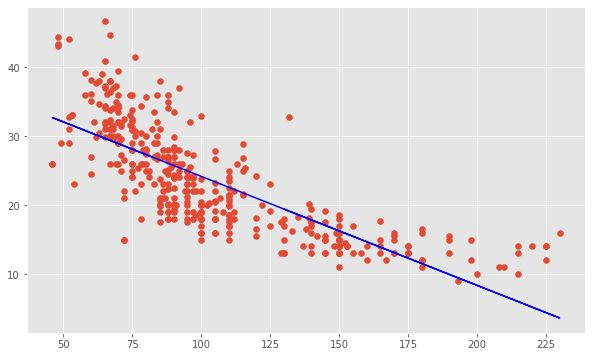

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x='horsepower', y='mpg', data=df)
ax.plot(df.horsepower.values, results.fittedvalues, 'b',label='OLS' )

<h2> Describing the results </h2>
<ol>There is a negative relationship when mpg and horsepower (-0.1578 coefficient).</ol>
<ol>There is a strong relationship between horsepower and mpg, as the p-value is very low</ol>
<ol>There is a negative slope to the data, with a slight curvve. This suggests the data is not perfectly linear</ol>
<ol>A prediction of 98 horsepower will results in 24.5 mpg   </ol>

# Peforming Estimate Diagnostics
Plot the residuals

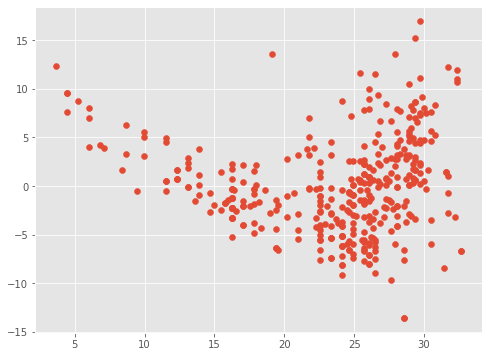

In [7]:
# obtaining the fitted values and residuals
fitted_values = results.fittedvalues
residuals = results.resid.values


fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(fitted_values, residuals)

Upon looking at the plot of residuals, it is clear **Heteroscedasticity** is present. This means there is a non-constant variance in the error term, thereby violating the assumptions of linear regression. **Solution** is to transform Y using a concave function, such as Log Y or root Y

# Quadratic Fit


In [36]:
df['horsepower**2']= df.horsepower**2

x_quadratic = sm.add_constant(df[['horsepower', 'horsepower**2']])

y = df.mpg

quad_model = sm.OLS(y, x_quadratic)
quad_results = quad_model.fit()

In [37]:
print(quad_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           5.40e-99
Time:                        21:50:52   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            56.9001      1.800     31.604

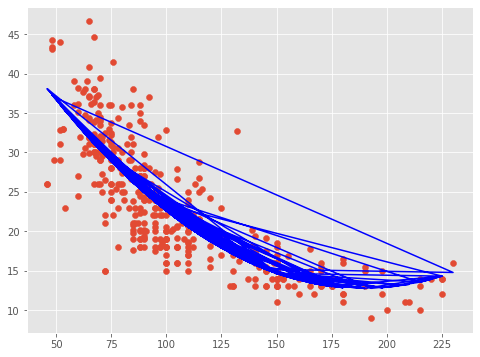

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x='horsepower', y='mpg', data=df)
ax.plot(df.horsepower.values, quad_results.fittedvalues, 'b')

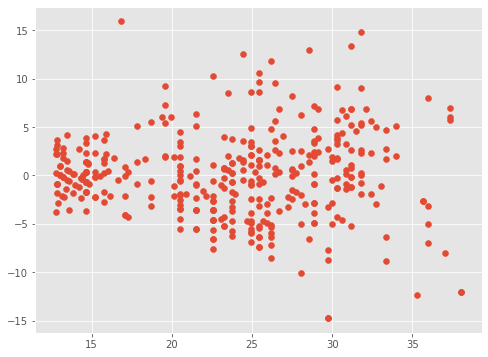

In [29]:
# residuals
quad_fitted = quad_results.fittedvalues
quad_resid = quad_results.resid.values

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter( quad_fitted, quad_resid)